In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
email=pd.read_csv("emails.csv")

In [3]:
email.columns

Index(['text', 'spam'], dtype='object')

In [4]:
email.head(10)

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
5,"Subject: great nnews hello , welcome to medzo...",1
6,Subject: here ' s a hot play in motion homela...,1
7,Subject: save your money buy getting this thin...,1
8,Subject: undeliverable : home based business f...,1
9,Subject: save your money buy getting this thin...,1


In [9]:
x=email["text"]
y=email["spam"]

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv=TfidfVectorizer(stop_words='english')
x_traincv=cv.fit_transform(x_train)

In [12]:
from sklearn import model_selection,svm

In [13]:
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(x_traincv,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [15]:
x_testcv=cv.transform(x_test)

In [17]:
pred1=SVM.predict(x_testcv)

In [18]:
pred1

array([0, 0, 1, ..., 0, 0, 1], dtype=int64)

In [19]:
actual=np.array(y_test)

In [20]:
actual

array([0, 0, 1, ..., 0, 0, 1], dtype=int64)

In [21]:
count=0
for i in range (len(pred)):
    if pred[i]==actual[i]:
        count=count+1

In [22]:
count

1140

In [23]:
len(pred1)

1146

In [24]:
accuracy = count/len(pred1)

In [25]:
accuracy

0.9947643979057592

In [26]:
from sklearn.metrics import confusion_matrix
conf=confusion_matrix(y_test,pred)

In [27]:
conf

array([[883,   2],
       [  4, 257]], dtype=int64)

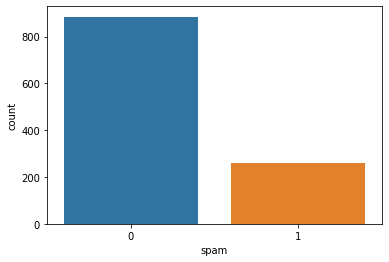

In [28]:
import seaborn as sns
# sns.countplot(pred)
# sns.countplot(y_train)
sns.countplot(y_test)

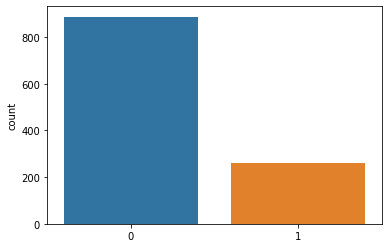

In [29]:
import seaborn as sns
sns.countplot(pred1)